## Read Dataset
* This is a "churn" dataset of a cable internet proivider similar to Verizon.
* This dataset contains some customer demograhphic variables as well as some variales about their status such as how long they have been a customer with this company, what their monthly bill is etc.
>* **Churn:** Churn refers to customers leaving a company, such as discopnnecting their services and switch their provider. Example: You cancel yor Hulu subscription. You switch from Verizon to Optimum.
Companies want to minimize customer churn because they do not want to lose customers.
>* Their goal is to early predict which customers are more likely churn so they can give them some promotions to convince them not to cancel their services.

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
from sklearn.model_selection import train_test_split  # Import the train_test_split function from sklearn

# Read the 'telco_churn.csv' file into a pandas DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/BusinessAnalyticsInstitution/Data_Mining_Datasets/refs/heads/main/telco_churn.csv')

# Convert the 'SeniorCitizen' column to a string data type
# This is often done when numerical values need to be treated as categorical variables
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)

## Determine Categorical and Numerical Variables
* Determining numerical and categorical variables before preprocessing is crucial because each type requires different handling, such as scaling for numerical data and encoding for categorical data.
* This distinction ensures the model processes the features correctly, improving its accuracy and performance.

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [ ]:
output_variable = 'Churn'
# Select columns that have numerical data types (excluding 'object' types) and store them in 'numerical_variables'
numerical_variables = data.select_dtypes(exclude='object').columns
numerical_variables = list(set(numerical_variables) - set([output_variable]))
# Select columns that have categorical data types (including 'object' types) and store them in 'categorical_variables'
categorical_variables = data.select_dtypes(include='object').columns
categorical_variables= list(set(categorical_variables) - set([output_variable]))

In [ ]:
data[output_variable] = data[output_variable].replace({'Yes':1, 'No':0})

<ipython-input-5-f16335eb56bd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[output_variable] = data[output_variable].replace({'Yes':1, 'No':0})


## Split Data into Train and Test
* Splitting the dataset into training and testing sets before preprocessing prevents data leakage, ensuring that the model is evaluated on unseen data.
>* Data leakage occurs when information from the test set or future data is inappropriately used during model training, leading to overly optimistic performance results.
* This helps maintain the integrity of the model's performance assessment by providing an unbiased evaluation of its generalization to new data.
* The training set is used to train the machine learning model by allowing it to learn patterns and relationships in the data.
* The test set is then used to evaluate the model's performance on unseen data, ensuring it generalizes well to new, real-world inputs.

In [ ]:
# Separate the features (independent variables) and the target (dependent variable)
# 'X' will contain all columns except 'Churn_Yes'
X = data.loc[:, data.columns != 'Churn']
# 'y' will contain only the 'Churn_Yes' column, which is the target variable
y = data.loc[:, 'Churn']
# Split the data into training and testing sets
# 'test_size=0.33' means 33% of the data will be used for testing and 67% for training
# 'random_state=42' ensures reproducibility by using the same random seed for shuffling the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Data Prep Pipeline

In [ ]:
data['Churn'].value_counts()[0]

5174

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocessor = Pipeline(steps = [
        ("imputation_median", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),])

categorical_preprocessor = Pipeline(steps = [
    ("imputation_constant",SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),])

preprocessor = ColumnTransformer(
    [
        ("cat", categorical_preprocessor, categorical_variables),
        ("num", numeric_preprocessor, numerical_variables),
    ]
)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, class_weight = {0:data['Churn'].value_counts()[1], 1:data['Churn'].value_counts()[0]})

pipe = make_pipeline(preprocessor,clf).set_output(transform = 'pandas')
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['StreamingMovies',
                                                   'InternetService',
                                                   'Dependents', 'Partner',
                                                   'Contract', 'PhoneService',
                                                   'PaymentMethod',
                                                   'TechSupport', 'gende...
                                                   'OnlineBackup',
                                                   'SeniorCitizen',
                                                   'StreamingTV',
                                                   'OnlineSecurity',
                                                   'DeviceProtection',
                                                   'PaperlessBilling']),
                                                 ('num',
                                                  Pipeline(steps=[('imputation_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'tenure'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight={0: 1869, 1: 5174},
                                        random_state=0))])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['StreamingMovies',
                                                   'InternetService',
                                                   'Dependents', 'Partner',
                                                   'Contract', 'PhoneService',
                                                   'PaymentMethod',
                                                   'TechSupport', 'gende...
                                                   'OnlineBackup',
                                                   'SeniorCitizen',
                                                   'StreamingTV',
                                                   'OnlineSecurity',
                                                   'DeviceProtection',
                                                   'PaperlessBilling']),
                                                 ('num',
                                                  Pipeline(steps=[('imputation_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'tenure'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight={0: 1869, 1: 5174},
                                        random_state=0))])

In [ ]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

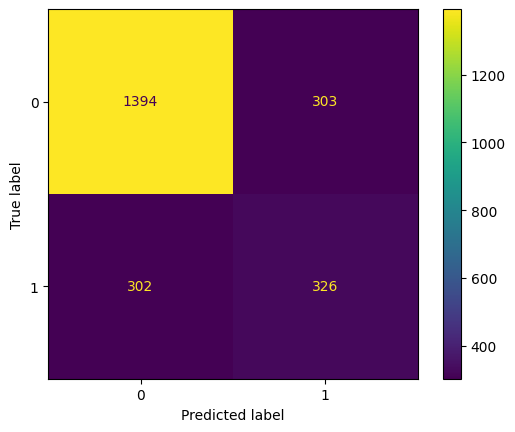

In [ ]:
# Generating a confusion matrix by comparing the actual values with the predicted values
# 'pred_vs_actual['Actual']' contains the true labels, and 'pred_vs_actual['Predictions']' contains the predicted labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # For visualizing the confusion matrix
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred) # visualize confusion matrix


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1697
           1       0.52      0.52      0.52       628

    accuracy                           0.74      2325
   macro avg       0.67      0.67      0.67      2325
weighted avg       0.74      0.74      0.74      2325



In [ ]:
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))

In [ ]:
pipe.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
pipe.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])